## <p style = 'text-align: center'>CUSTOMER SEGMENTATION USING KMEANS CLUSTERING</p>
---




<p align="center">
<img src="k-means-clustering-algorithm-in-machine-learning.png" width="800" height="300" />
</p>

## Importing the necessary Libraries


In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'darkgrid')

In [344]:
df = pd.read_csv(r'C:\Users\Bildad Otieno\Documents\Billy_Repo\Customer_Segmentation\marketing_campaign.xls', sep = '\t')
df.index = df.index +1
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [345]:
# The dimensions of the dataset, we have 200 records and 5 Columns
df.shape

(2240, 29)

In [346]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [347]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [348]:
df.dropna(inplace=True)

In [349]:
df.drop_duplicates(inplace=True)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 1 to 2240
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [351]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [352]:
#Dt_Customer indicates date Customer joined database
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\Bildad Otieno\AppData\Local\Temp\ipykernel_21676\2781831106.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [353]:
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2216 entries, 1 to 2240
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB


In [354]:
print('Last customer registered date:',max(df['Dt_Customer']))
print('Earliest customer registered date:',min(df['Dt_Customer']))

Last customer registered date: 2014-12-06 00:00:00
Earliest customer registered date: 2012-01-08 00:00:00


In [355]:
#Finding the relative time one has been a customer

End_date = max(df['Dt_Customer'])
Duration = []
for d in df['Dt_Customer']:
    diff = End_date - d
    diff = pd.Timedelta(diff)
    Duration.append(diff.days)

In [356]:
#Assigning the dates as a column within the dataframe
df['Customer_For (Days)'] = Duration

In [357]:
df['Cust_Age'] = 2023 - df['Year_Birth']

In [358]:
#Calculating total expenditure per customer
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [359]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For (Days),Cust_Age,Spent
1,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,971,66,1617
2,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,125,69,27
3,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,472,58,776
4,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,65,39,53
5,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,321,42,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,541,56,1341
2237,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,1,0,0,3,11,0,61,77,444
2238,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,315,42,1241
2239,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,316,67,843


In [360]:
#Reducing Categorical Values in Marital_Status to Partner and Alone
df['Lives_With'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [361]:
#Merging values in columns Kidhome and Teenhome
df["No_of_Children"] = df['Kidhome'] + df['Teenhome'] 

In [362]:
#Creating a new Column "Family_Size" indicating size of Customer Household
df['Lives_With'].replace({"Alone":1, "Partner":2}, inplace=True)

df["Family_Size"] = df['Lives_With'] + df['No_of_Children']

In [363]:
#If the condition is true (i.e., if the value in the "Children" column is greater than 0), the corresponding element in the new "Is_Parent" column is set to 1. If the condition is false, the corresponding element is set to 0.
df['Is_Parent'] = np.where(df['No_of_Children'] > 0,1,0)

In [364]:
#Reducing Categorical Values of Education into 3: UnderGrad, Grad, PostGrad
df["Education"] = df['Education'].replace({"Basic":"UnderGrad", "2n Cycle":"UnderGrad", "PhD":"PostGrad", "Graduation":"Grad", "Master":"Grad"})

In [365]:
#Renaming Columns
df = df.rename(columns={"MntWines":"Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

In [366]:
#Retaining the new features generated and removing the old ones
df = df.drop(columns={'Dt_Customer', 'Marital_Status', 'Kidhome', 'Teenhome', 'Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue', 'Lives_With'})

In [367]:
df.columns

Index(['Education', 'Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For (Days)',
       'Cust_Age', 'Spent', 'No_of_Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

C:\Users\Bildad Otieno\AppData\Local\Temp\ipykernel_21676\3558545500.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.pairplot(df[{"Income", "Recency", "Customer_For (Days)", "Cust_Age", "Spent", "Is_Parent"}], hue = "Is_Parent")


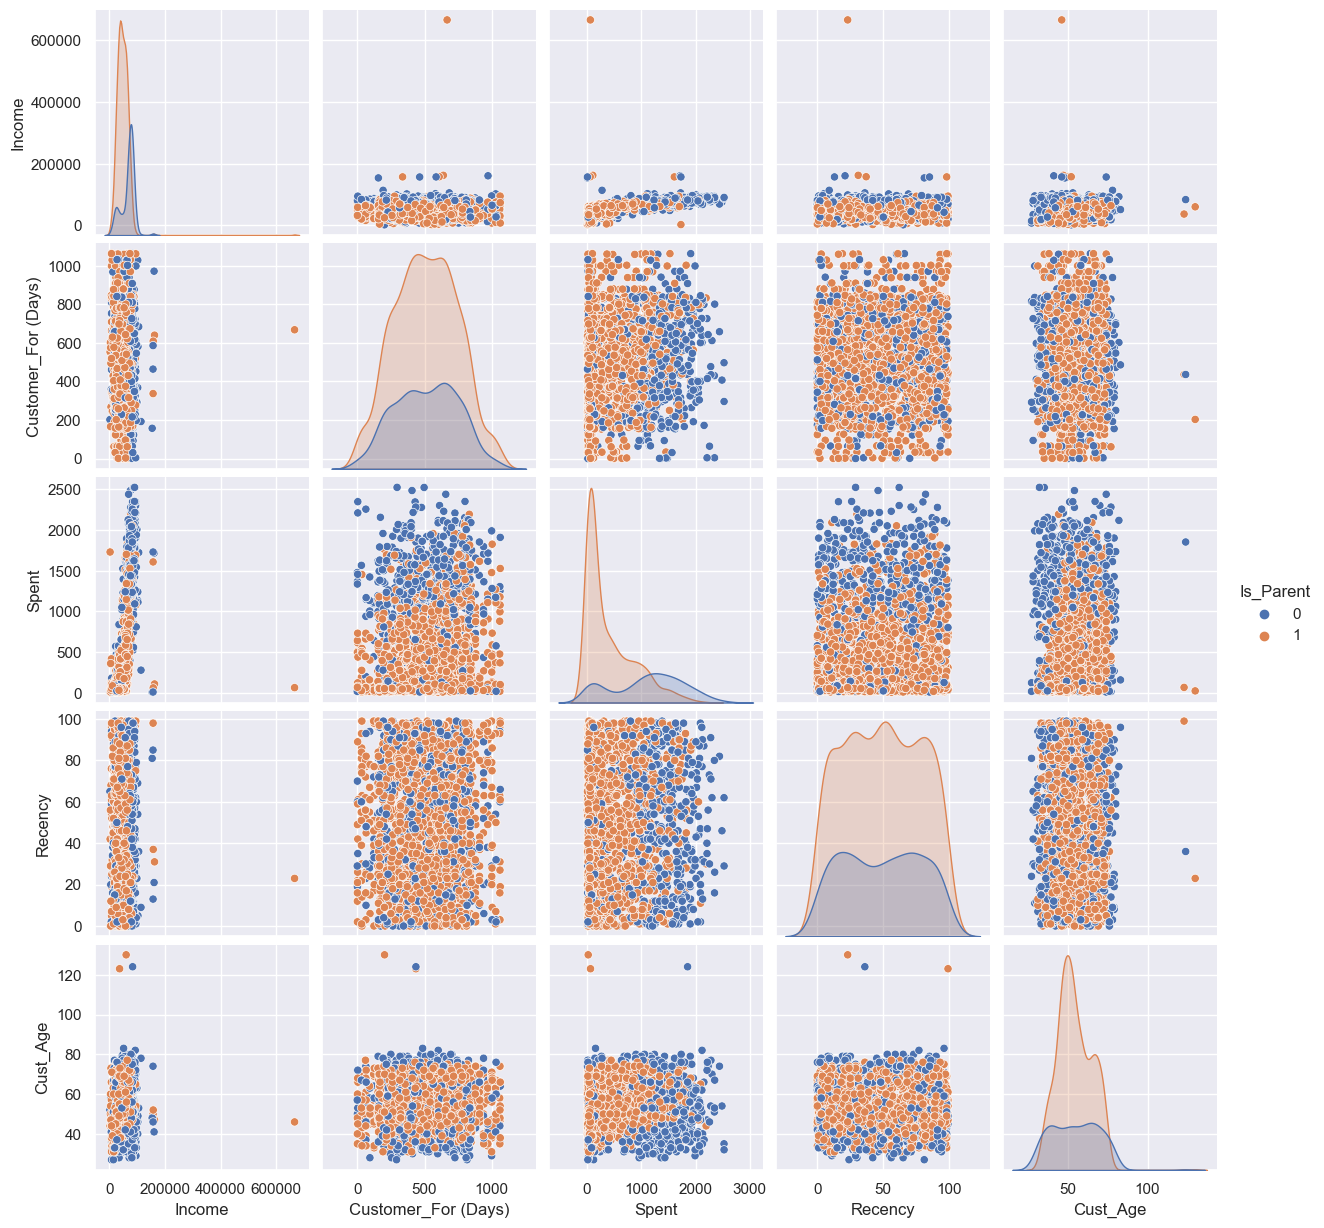

In [372]:
sns.pairplot(df[{"Income", "Recency", "Customer_For (Days)", "Cust_Age", "Spent", "Is_Parent"}], hue = "Is_Parent")

In [ ]:
data = df[df["Age"]<90]

In [ ]:
df['Marital_Status'].value_counts()

KeyError: 'Marital_Status'